In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

# Data Description

In [2]:
df = pd.read_csv('london_crime_by_lsoa.csv')
df.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [3]:
df.shape

(13490604, 7)

## About The Data
- lsoa_code: ini mewakili area kepolisian
- borough: Wilayah london yang memiliki keterkaitan statistik
- major_category: kategori kejahatan berat
- minor_category: kategori kejahatan ringan
- value: jumlah kejahatan untuk wilayah tertentu, pada bulan tertentu
- year: Ringkasan statistik tahunan
- month: Ringkasan statistik bulan

# Data Cleansing

### Check data type

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


##### *Notes 1.0*
- untuk meringankan komputasi mari kita ganti data yang object menjadi tipe data yang seharusnya (kategorik)

In [5]:
# change data type
df[['borough','major_category','minor_category']] = df[['borough','major_category','minor_category']].astype('category')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype   
---  ------          -----   
 0   lsoa_code       object  
 1   borough         category
 2   major_category  category
 3   minor_category  category
 4   value           int64   
 5   year            int64   
 6   month           int64   
dtypes: category(3), int64(3), object(1)
memory usage: 450.3+ MB


##### *Notes 1.1*
- disini saya berhasil mengurangi beban komputasi proses dari 720.5+Megabyte menjadi 450.3+Megabyte, hanya dengan mengganti tipe datanya saja 

### Check Missing Value

In [7]:
df.isna().sum()

lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64

##### *Notes 1.2*
- tidak terdapat satupun nilai kosong dari semua kolom yang ada

### Check Duplicated data

In [8]:
df.duplicated().sum()

0

##### *Notes 1.3*
- tidak terdapat satupun data terduplikasi dari semua kolom yang ada, artinya semua nilai uniq

### Filter / drop yang memiliki value 0 ,disini karna jumlah kejahatan pada bulan-bulan tertentu tidak ada, alias 0 maka akan kita filter sehingga menjadi data yang relvant, serta disini saya juga akan hanya mengambil data setahun kebelakang dari 2016 saja.

In [9]:
df = df[(df['year'] >= 2015) & (df['value'] > 0)]
df

,lsoa_code,borough,major_category,minor_category,value,year,month
9,E01004177,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8
32,E01000733,Bromley,Criminal Damage,Criminal Damage To Motor Vehicle,1,2016,4
57,E01033083,Hounslow,Violence Against the Person,Wounding/GBH,2,2015,8
64,E01003989,Southwark,Theft and Handling,Theft From Shops,4,2016,8
112,E01002276,Havering,Burglary,Burglary in a Dwelling,1,2016,8
...,...,...,...,...,...,...,...
13490558,E01032563,Bromley,Criminal Damage,Other Criminal Damage,2,2015,5
13490560,E01002888,Kensington and Chelsea,Violence Against the Person,Harassment,1,2015,12
13490580,E01003154,Lambeth,Burglary,Burglary in a Dwelling,3,2015,10
13490584,E01003301,Lewisham,Violence Against the Person,Assault with Injury,1,2015,10


# Exploratory Data Analyisis

In [10]:
df.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
9,E01004177,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8
32,E01000733,Bromley,Criminal Damage,Criminal Damage To Motor Vehicle,1,2016,4
57,E01033083,Hounslow,Violence Against the Person,Wounding/GBH,2,2015,8
64,E01003989,Southwark,Theft and Handling,Theft From Shops,4,2016,8
112,E01002276,Havering,Burglary,Burglary in a Dwelling,1,2016,8


In [11]:
df.lsoa_code

9           E01004177
32          E01000733
57          E01033083
64          E01003989
112         E01002276
              ...    
13490558    E01032563
13490560    E01002888
13490580    E01003154
13490584    E01003301
13490600    E01002504
Name: lsoa_code, Length: 773901, dtype: object

disini saya akan mendrop kolom Isoa_code karna kolom tersebut unique menandakan setiap nilai kejadian memiliki kode unique

In [12]:
# drop unique Isoa_code
df = df.drop(['lsoa_code'],axis=True)
df.head()

,borough,major_category,minor_category,value,year,month
9,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8
32,Bromley,Criminal Damage,Criminal Damage To Motor Vehicle,1,2016,4
57,Hounslow,Violence Against the Person,Wounding/GBH,2,2015,8
64,Southwark,Theft and Handling,Theft From Shops,4,2016,8
112,Havering,Burglary,Burglary in a Dwelling,1,2016,8


In [13]:
df2 = df.copy()

In [14]:
df2.shape

(773901, 6)

In [15]:
df3 = df2.groupby(['borough','major_category','minor_category','year','month']) \
                            .agg(total_major_category = ('major_category', 'count'), \
                                 total_minor_category = ('minor_category', 'count'),
                                 total_crime = ('value', 'sum'))
df3 = df3.reset_index()
df3 = df3[df3['total_crime'] >0]
df3

,borough,major_category,minor_category,year,month,total_major_category,total_minor_category,total_crime
24,Barking and Dagenham,Burglary,Burglary in Other Buildings,2015,1,15,15,21
25,Barking and Dagenham,Burglary,Burglary in Other Buildings,2015,2,22,22,28
26,Barking and Dagenham,Burglary,Burglary in Other Buildings,2015,3,24,24,40
27,Barking and Dagenham,Burglary,Burglary in Other Buildings,2015,4,26,26,42
28,Barking and Dagenham,Burglary,Burglary in Other Buildings,2015,5,23,23,39
...,...,...,...,...,...,...,...,...
228091,Westminster,Violence Against the Person,Wounding/GBH,2016,8,50,50,99
228092,Westminster,Violence Against the Person,Wounding/GBH,2016,9,47,47,105
228093,Westminster,Violence Against the Person,Wounding/GBH,2016,10,52,52,105
228094,Westminster,Violence Against the Person,Wounding/GBH,2016,11,31,31,96


# Data Visualization

## Area Plot

In [16]:
## Manipulate for Area Plot
areaplot = df3[['total_major_category','total_crime','year','month']]
areaplot.sort_values(by=['year'], ascending=False)

,total_major_category,total_crime,year,month
228095,45,131,2016,12
96569,36,53,2016,6
96571,35,47,2016,8
96572,34,45,2016,9
96573,36,42,2016,10
...,...,...,...,...
103704,20,27,2015,1
103705,28,34,2015,2
103706,35,52,2015,3
103707,36,47,2015,4


In [17]:
areaplot1 = areaplot.groupby(['year']) \
                            .agg(total_major_category = ('total_major_category', 'sum'), \
                                 total_crime = ('total_crime', 'sum'))
areaplot1 = areaplot1.reset_index()
areaplot1

,year,total_major_category,total_crime
0,2015,381859,711624
1,2016,392042,736121


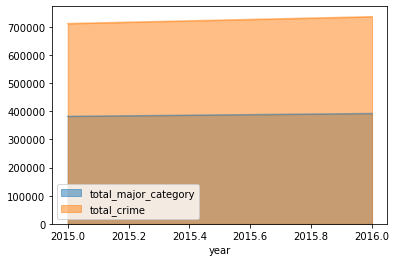

In [18]:
ax = areaplot1.plot.area(x='year',stacked=False)

darisini kita dapat ketahui bahwa total kejahatan dari 2015 - 2016 meningkat sebanyak 24497 dari 711624 di tahun 2015 dan sebanyak 736121 di tahun 2016, serta kategori kejahatan berat yang tercatat memiliki peningkatan juga sebanyak 10183 kategori.

## Histogram 

In [19]:
## Manipulate for Histogram
histplt = areaplot.groupby(['year','month']) \
                            .agg(total_major_category = ('total_major_category', 'sum'), \
                                 total_crime = ('total_crime', 'sum'))
histplt = histplt.reset_index()
histplt = histplt[histplt['year'] == 2016]
histplt

,year,month,total_major_category,total_crime
12,2016,1,31719,58847
13,2016,2,30946,56697
14,2016,3,32082,59167
15,2016,4,31760,58637
16,2016,5,34057,63990
17,2016,6,32955,62262
18,2016,7,34312,65519
19,2016,8,33090,62666
20,2016,9,32891,61412
21,2016,10,33619,63405


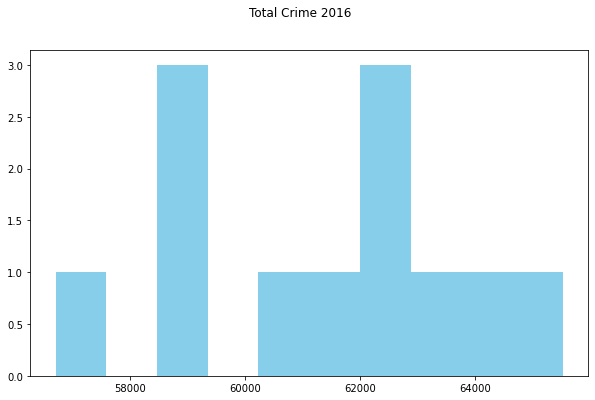

In [20]:
## Histogram
fig,ax = plt.subplots(figsize=(10,6))
plt.hist(histplt.total_crime, color = 'skyblue')
plt.suptitle('Total Crime 2016')
plt.show()

In [21]:
histplt.describe()

,year,month,total_major_category,total_crime
count,12.0,12.000000,12.000000,12.000000
mean,2016.0,6.500000,32670.166667,61343.416667
std,0.0,3.605551,1007.567804,2566.996953
min,2016.0,1.000000,30946.000000,56697.000000
25%,2016.0,3.750000,32001.500000,59087.000000
50%,2016.0,6.500000,32653.000000,61837.000000
75%,2016.0,9.250000,33222.250000,62850.750000
max,2016.0,12.000000,34312.000000,65519.000000


darisini saya hanya ingin melihat distribusi total kejahatan pada tahun 2016 saja, dan dapat kita ketahui dari plot histogram diatas bahwa total kejahatan pada tahun 2016 terjadi > 6000, dan rata" nya ada di 61343 dengan median 61837.

## Bar Chart

In [22]:
## Bar Chart
bar = df3[df3['borough'].isin(['City of London','Enfield', 'Greenwich'])]
bar = bar[['year','borough','major_category','total_major_category','total_crime']]
bar = bar.groupby(['borough']) \
                            .agg(total_major_category = ('total_major_category', 'sum'), \
                                 total_crime = ('total_crime', 'sum'))
bar = bar.reset_index()
bar = bar[bar['total_crime'] > 0].sort_values(by=['total_crime'], ascending=False).reset_index(drop=True)
bar

,borough,total_major_category,total_crime
0,Enfield,26960,44561
1,Greenwich,24820,43659
2,City of London,238,329


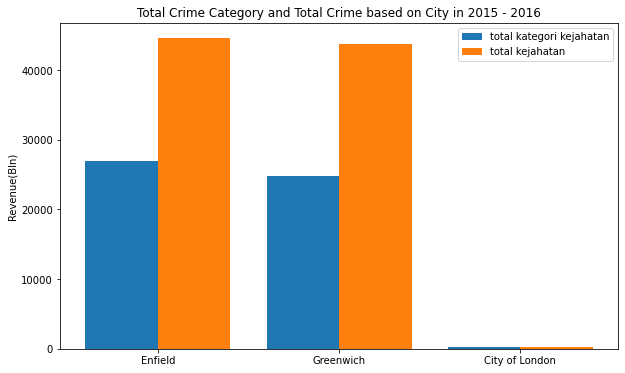

In [23]:
## Bar Chart
color = ['#A7D2CB','#F2D388','#C98474','#874C62']
xpos = np.arange(len(bar['borough']))
fig,ax = plt.subplots(figsize=(10,6))
plt.bar(xpos-0.2,bar.total_major_category, width=0.4, label="total kategori kejahatan")
plt.bar(xpos+0.2,bar.total_crime, width=0.4,label="total kejahatan")

plt.xticks(xpos,bar['borough'])
plt.ylabel("Revenue(Bln)")
plt.title('Total Crime Category and Total Crime based on City in 2015 - 2016')
plt.legend();

dari barchart diatas kita dapat melihat bahwa jumlah kejahatan tertinggi berada di kota enfield dengan jumlah kategori kejahatan yang juga lebih besar ketimbang kedua kota lainnya, namun selisihnya tidak jauh berbeda dengan kota greenwich, dan kota london adalah kota yang memiliki tingkat kejahatan ter rendah di antara tahun 2015-2016.

## Pie Chart

In [24]:
## Pie Chart
pie = df3[['borough','major_category','total_major_category','total_crime']]
pie = pie.groupby(['borough','major_category']) \
                            .agg(total_major_category = ('total_major_category', 'sum'), \
                                 total_crime = ('total_crime', 'sum'))
pie = pie.reset_index()
pie = pie[(pie['total_crime'] > 0) & (pie['borough'] == 'Enfield')].sort_values(by=['total_crime'], ascending=False).reset_index(drop=True)
pie

,borough,major_category,total_major_category,total_crime
0,Enfield,Theft and Handling,8343,15864
1,Enfield,Violence Against the Person,8492,14126
2,Enfield,Burglary,3342,5350
3,Enfield,Criminal Damage,3307,4262
4,Enfield,Drugs,1526,2294
5,Enfield,Robbery,1185,1746
6,Enfield,Other Notifiable Offences,765,919


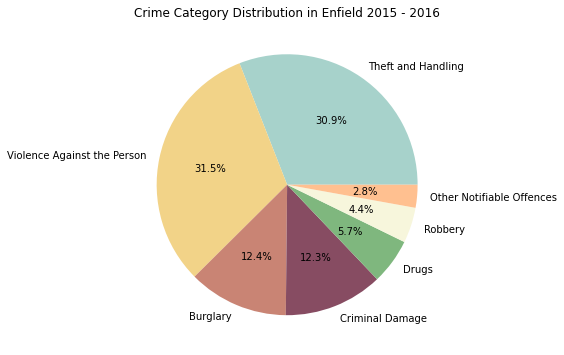

In [25]:
label = pie['major_category']
count = pie['total_major_category']
color = ['#A7D2CB','#F2D388','#C98474','#874C62','#7FB77E','#F7F6DC', '#FFC090']

plt.figure(1, figsize=(10,6))
plt.pie(count, labels=label, colors=color, autopct='%1.1f%%')
plt.title('Crime Category Distribution in Enfield 2015 - 2016', size=12, pad=5)
plt.show()

Pie chart diatas menggambarkan bawha persentase tingkat kejahatan di kota enfield dari tahun 2015 sampai 2016 tertinggi ada pada kekerasan terhadap seseorang, dan pencurian, dari sini seharusnya pihak kepolisian disana dapat memberi prioritas tinggi terhadap 2 kasus tertinggi ini.

In [26]:
## Pie Chart
box = df3[['borough','major_category','total_major_category','total_crime','month','year']]
box = box.groupby(['borough','year','month']) \
                            .agg(total_major_category = ('total_major_category', 'sum'), \
                                 total_crime = ('total_crime', 'sum'))
box = box.reset_index()
box = box[box['year'] == 2016]
box = box[(box['total_crime'] > 0) & (box['borough'] == 'Enfield')].sort_values(by=['total_crime'], ascending=False).reset_index(drop=True)
box

,borough,year,month,total_major_category,total_crime
0,Enfield,2016,5,1215,2049
1,Enfield,2016,7,1191,1972
2,Enfield,2016,10,1195,1972
3,Enfield,2016,3,1168,1961
4,Enfield,2016,11,1168,1960
5,Enfield,2016,9,1136,1900
6,Enfield,2016,4,1121,1880
7,Enfield,2016,12,1079,1779
8,Enfield,2016,6,1088,1777
9,Enfield,2016,8,1107,1773


In [27]:
box.describe()

,year,month,total_major_category,total_crime
count,12.0,12.000000,12.000000,12.000000
mean,2016.0,6.500000,1138.166667,1873.750000
std,0.0,3.605551,47.680439,110.852174
min,2016.0,1.000000,1079.000000,1723.000000
25%,2016.0,3.750000,1102.250000,1776.000000
50%,2016.0,6.500000,1128.500000,1890.000000
75%,2016.0,9.250000,1173.750000,1963.750000
max,2016.0,12.000000,1215.000000,2049.000000


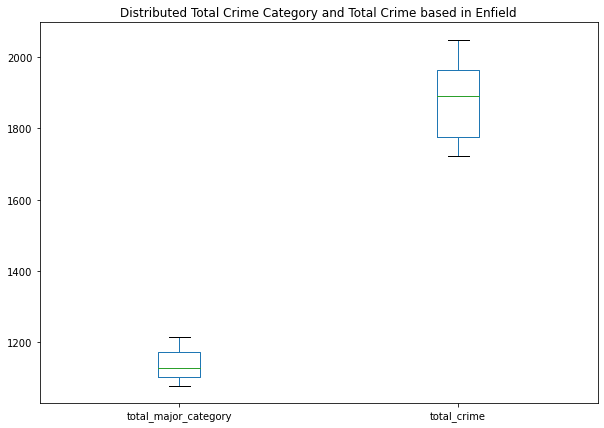

In [28]:
box.plot(kind = 'box', y = ['total_major_category', 'total_crime'], figsize=(10,7))
plt.title('Distributed Total Crime Category and Total Crime based in Enfield')
plt.show()

kita dapat mengetahui dari distibusi boxplot diatas bahwa ukuran pemusatan data dari total_crime (*masure of central tendency*) nya mean berada di : 1873.75, median : 1890, modus : 1972, serta ukuran pesebaran datanya (*masure of variance*) di : standar deviasi : 110.852, IQR(Inter Quartile Range) : Q3-Q1 = 1963.75 - 1776.00 = 187.75

## Scatter Plot

In [29]:
scat = df3[['borough','major_category','total_major_category','total_crime','year']]
scat = scat[scat['borough'].isin(['City of London','Enfield', 'Greenwich'])]
scat = scat[scat['year'] == 2016 ].sort_values(by=['total_crime'], ascending=False).reset_index(drop=True)
scat

,borough,major_category,total_major_category,total_crime,year
0,Greenwich,Violence Against the Person,110,309,2016
1,Greenwich,Theft and Handling,99,289,2016
2,Greenwich,Violence Against the Person,112,286,2016
3,Greenwich,Theft and Handling,83,284,2016
4,Greenwich,Violence Against the Person,115,268,2016
...,...,...,...,...,...
696,City of London,Violence Against the Person,1,1,2016
697,City of London,Violence Against the Person,1,1,2016
698,City of London,Violence Against the Person,1,1,2016
699,City of London,Violence Against the Person,1,1,2016


In [30]:
scat = scat.groupby(['borough','major_category']) \
                            .agg(total_major_category = ('total_major_category', 'sum'), \
                                 total_crime = ('total_crime', 'sum'))
scat = scat.reset_index()
scat = scat[scat['total_crime'] > 0].sort_values(by=['total_crime'], ascending=False)
scat

,borough,major_category,total_major_category,total_crime
98,Greenwich,Violence Against the Person,4386,8590
88,Enfield,Theft and Handling,4300,8037
97,Greenwich,Theft and Handling,3936,8010
89,Enfield,Violence Against the Person,4407,7409
81,Enfield,Burglary,1628,2541
91,Greenwich,Criminal Damage,1855,2476
82,Enfield,Criminal Damage,1669,2136
90,Greenwich,Burglary,1196,1780
83,Enfield,Drugs,703,1063
92,Greenwich,Drugs,613,867


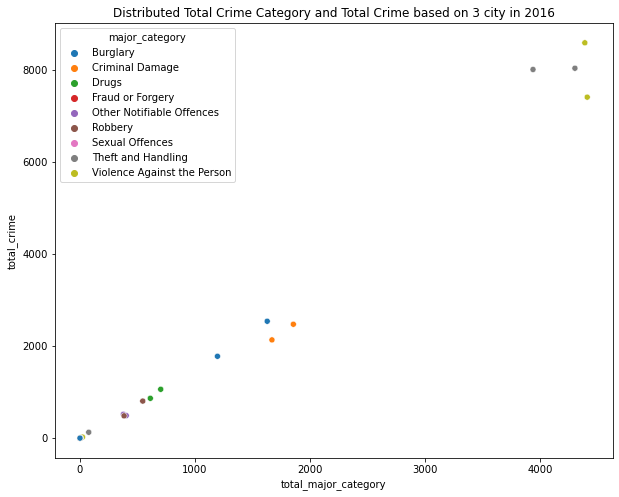

In [31]:
## scater plot
fig, ax = plt.subplots(figsize=(10,8))
plt.title('Distributed Total Crime Category and Total Crime based on 3 city in 2016')
sns.scatterplot(data=scat, x="total_major_category", y="total_crime", hue="major_category");

terlihat distribusi total kejahatan berat dari ketiga kota tersebut sebanyak 2 sampai 2000 kejahatan memiliki rentan total kriminalitas di 2 sampai > 2200.